https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/overview

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
from pycaret.classification import *

In [ ]:
# data

df_train = pd.read_csv("../data/train.csv", index_col="id")
df_test = pd.read_csv("../data/test.csv", index_col="id")

df_train

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


In [ ]:
df_train.skew()

id                0.000000
loading           0.956830
attribute_2       0.381773
attribute_3      -0.404226
measurement_0     0.706101
measurement_1     0.476384
measurement_2     0.592461
measurement_3    -0.001618
measurement_4     0.006993
measurement_5     0.012872
measurement_6    -0.009671
measurement_7    -0.018490
measurement_8     0.015340
measurement_9    -0.003072
measurement_10   -0.030938
measurement_11   -0.105878
measurement_12   -0.053357
measurement_13    0.237164
measurement_14   -0.057608
measurement_15    0.089165
measurement_16    0.071114
measurement_17    0.000207
failure           1.404894
dtype: float64

[]

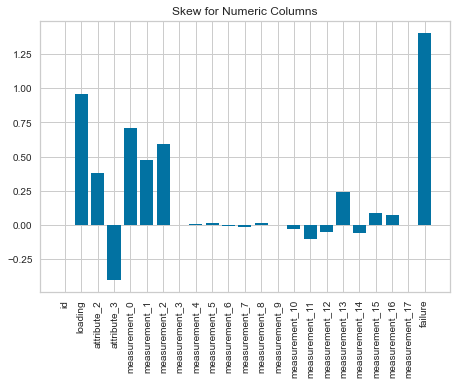

In [ ]:
skew_score = df_train.skew()
names = skew_score.index
values = skew_score.values

plt.figure(figsize=(25, 5))
plt.subplot()
plt.subplot(131)
plt.bar(names, values)
plt.xticks(rotation=90)
plt.title("Skew for Numeric Columns")

plt.plot()

## Lazy pycaret baseline

In [ ]:
s = setup(data=df_train, target="failure", n_jobs=-1)

,Description,Value
0,session_id,6374
1,Target,failure
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26570, 26)"
5,Missing Values,True
6,Numeric Features,20
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7888,0.5494,0.0018,0.2500,0.0035,0.0020,0.0127,1.0610
lda,Linear Discriminant Analysis,0.7888,0.5826,0.0036,0.4583,0.0071,0.0040,0.0260,0.0420
dummy,Dummy Classifier,0.7888,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
ridge,Ridge Classifier,0.7887,0.0000,0.0003,0.0500,0.0005,0.0001,-0.0001,0.0260
lr,Logistic Regression,0.7886,0.5812,0.0015,0.2833,0.0030,0.0013,0.0103,0.9680
et,Extra Trees Classifier,0.7886,0.5469,0.0000,0.0000,0.0000,-0.0005,-0.0053,0.4130
gbc,Gradient Boosting Classifier,0.7883,0.5758,0.0018,0.2119,0.0035,0.0009,0.0049,1.1510
ada,Ada Boost Classifier,0.7879,0.5676,0.0028,0.4226,0.0055,0.0013,0.0134,0.2550
lightgbm,Light Gradient Boosting Machine,0.7877,0.5542,0.0043,0.2648,0.0085,0.0027,0.0099,0.0800
nb,Naive Bayes,0.7842,0.5697,0.0306,0.3750,0.0563,0.0248,0.0520,0.2150


In [ ]:
lda = create_model(estimator="lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7866,0.5875,0.0000,0.0000,0.0000,-0.0053,-0.0268
1,0.7887,0.6282,0.0025,0.5000,0.0051,0.0029,0.0232
2,0.7898,0.5840,0.0076,0.7500,0.0151,0.0109,0.0613
3,0.7882,0.5872,0.0025,0.3333,0.0051,0.0019,0.0120
4,0.7876,0.5605,0.0000,0.0000,0.0000,-0.0021,-0.0170
5,0.7903,0.5791,0.0076,1.0000,0.0152,0.0120,0.0777
6,0.7887,0.5695,0.0051,0.5000,0.0101,0.0058,0.0328
7,0.7887,0.5728,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7891,0.5778,0.0051,0.5000,0.0101,0.0059,0.0329


In [ ]:
lda_tuned = tune_model(lda, optimize = "AUC", n_iter=10000,)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7876,0.5827,0.0026,0.2000,0.0050,-0.0003,-0.0014
1,0.7887,0.6295,0.0025,0.5000,0.0051,0.0029,0.0232
2,0.7887,0.5822,0.0025,0.5000,0.0051,0.0029,0.0232
3,0.7876,0.5910,0.0025,0.2500,0.0050,0.0008,0.0044
4,0.7882,0.5691,0.0051,0.4000,0.0101,0.0048,0.0240
5,0.7898,0.5848,0.0051,1.0000,0.0101,0.0080,0.0634
6,0.7887,0.5658,0.0051,0.5000,0.0101,0.0058,0.0328
7,0.7876,0.5891,0.0000,0.0000,0.0000,-0.0021,-0.0170
8,0.7891,0.5868,0.0051,0.5000,0.0101,0.0059,0.0329


## Clean / Transform Data

In [ ]:
print(df_train.info())
df_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


In [ ]:
df_train.select_dtypes(include="object")

,product_code,attribute_0,attribute_1
id,,,
0,A,material_7,material_8
1,A,material_7,material_8
2,A,material_7,material_8
3,A,material_7,material_8
4,A,material_7,material_8
...,...,...,...
26565,E,material_7,material_6
26566,E,material_7,material_6
26567,E,material_7,material_6


In [1]:
def hist(x):
    "returns a widget for histplot"
    return sns.histplot(df_train[x], kde=True, stat='density', linewidth=0)

interact(hist, x=df_train.dtypes[df_train.dtypes != 'object'].index)

NameError: ignored

In [ ]:
df_train.isnull().sum()

product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [ ]:
# is there null in the test data for submission?
df_test.isnull().sum()
# yes... hmm... how shoudl we handle nulls?

### Ideas
# maybe could use average measurements from each product code?
# could use simple mode?

product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

### Pipeline

- Fill nulls
- Confirm dtypes (attribute 1 & 2 made to strings for encoding)
- Encode Attributes
- Encode product codes


In [ ]:
def pipeline(data):
    df_clean = data.copy()
    columns = data.columns
    
    # fill null values with mode ---- this is the lazy way for now
    for column in columns:
        df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

    columns_2_encode = [col for col in columns if "attribute" in col] 
    columns_2_encode.append("product_code")
    print(columns_2_encode) # testing

    # make sure all encoded columns are strings before encoding (at1 & at2 are currently integers)
    for column in columns_2_encode:
        df_clean[column] = df_clean[column].astype('str')

    # encode da columns & concat
    encoded = pd.get_dummies(df_clean[columns_2_encode])
    df_clean.drop(columns=columns_2_encode, inplace=True)
    df_clean = pd.concat([encoded, df_clean], axis=1)


    return df_clean
#    return encoded

df_clean = pipeline(df_train)
print(df_clean.shape)
df_clean


['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3', 'product_code']
(26570, 38)


,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_8,attribute_2_5,attribute_2_6,attribute_2_8,attribute_2_9,attribute_3_5,attribute_3_6,attribute_3_8,attribute_3_9,product_code_A,product_code_B,product_code_C,product_code_D,product_code_E,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,80.10,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,15.755,13.034,14.684,764.100,0
1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,84.89,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,82.43,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,20.247,13.798,16.711,18.631,14.094,17.946,663.376,0
3,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,101.07,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,188.06,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,158.95,6,16,4,16.301,13.259,18.068,15.505,10.865,19.354,11.343,12.177,17.942,10.112,15.795,18.572,16.144,16.333,729.131,0
26566,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,146.02,10,12,8,17.543,11.905,17.984,19.078,11.139,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,115.62,1,10,1,15.670,11.535,16.778,18.385,11.630,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


In [ ]:
columns = df_train.columns
columns.str.contains("attribute")

col_temp = [col for col in columns if "attribute" in col]
col_temp
pd.get_dummies(df_train[col_temp])


,attribute_2,attribute_3,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_8
id,,,,,,,
0,9,5,0,1,0,0,1
1,9,5,0,1,0,0,1
2,9,5,0,1,0,0,1
3,9,5,0,1,0,0,1
4,9,5,0,1,0,0,1
...,...,...,...,...,...,...,...
26565,6,9,0,1,0,1,0
26566,6,9,0,1,0,1,0
26567,6,9,0,1,0,1,0


In [ ]:
df_temp = df_train.copy()
df_temp["attribute_2"] = df_temp["attribute_2"].astype('str')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  object 
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 